In [118]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('features_Z140Hep.csv')
data


,uid,NarrativeLE,NarrativeCME,LE_CircumstancesOtherText,CME_CircumstancesOtherText,MentalHealthProblem,DepressedMood,MentalIllnessTreatmentCurrnt,HistoryMentalIllnessTreatmnt,SuicideAttemptHistory,...,HealthProblemPainUnkDuration,LE_HealthProblemTypeDescription,CME_HealthProblemTypeDescription,HouseholdSubstanceAbuse,AbusedAsChild,PriorCPSReport,VictimKnownToAuthorities,InterpersonalViolencePerp,InterpersonalViolenceVictim,TraumaticBrainInjuryHistory
0,aaaf,"V (XX XX) shot himself in a motor vehicle.The V's mother called law enforcement, stated the V had made suicidal comments, and she reported the V as missing and suicidal with a firearm.The V was located in a vehicle in a retail parking lot. When law enforcement approached the vehicle the V shot himself.There are no other circumstances.",V (XX XX) shot himself in a motor vehicle.The V's mother called law enforcement and reported the V as missing and suicidal with a firearm.The V was located in a vehicle in a retail parking lot. When law enforcement approached the vehicle the V shot himself.There are no other circumstances.,NaN,NaN,0,0,0,0,0,...,0,NaN,NaN,0,0,0,0,0,0,0
1,aaby,V was XXXX. V was found in the basement of his residence hanging from a strap around the neck in an apparent suicide. V's roommates stated that they did not know of any disorders or medications that V would have taken and no indication of suicidal ideations. EMS was on the scene and pronounced V deceased. No further information regarding circumstance.,"V was XXXX. V was found in the basement of his residence hanging from a belt around the neck in an apparent suicide. V's mother described V as ""anti-social"" and a gamer who spent many hours of the day playing video games. EMS was on the scene and worked on V for half an hour and eventually pronounced V deceased. Toxicology results were negative for all substances tested. No further information regarding circumstance.",NaN,NaN,0,0,0,0,0,...,0,NaN,NaN,0,0,0,0,0,0,0
2,aacl,"V was XXXX. V was found in his residence unresponsive as the result of a GSW to the head that was suicidal in nature. V was transported by EMS to the hospital where he died. V's medical history was not included. According to this report, V called his mother from school and asked her to bring him something to eat. When she got to the school she saw V was very upset, and she decided to remove him from school and take him home. She reported that V was very upset lately. V's mother went on to say that V's brother was killed about 11 months prior (could not locate brother's information; unable to link) and V had not been dealing with it very well. V's mother had to go to work, so she called V's brother to tell him that V was upset and acting out and that she wanted him to come over and try to calm V down. V's brother responded to the residence and found V holding a ""machine gun."" V and his brother reportedly argued about choosing a better lifestyle and staying away from gangs and drugs. V's brother also tried to get him to put down the gun, and V was talking about wanting to kill himself. V put down the ""machine gun"", but then produced a handgun and shot himself. No further information regarding circumstances.","V was XXXX. V was found in his residence suffering from a GSW to the head that was suicidal in nature. V was transported by unknown means to the hospital where he died. V's medical history was not included. A narrative was not included with this report, so no information is known regarding the events prior to injury. Per Medicaid data, V had a history of substance abuse. V's toxicology was positive for nicotine, ketamine, and marijuana. No further information regarding circumstances.",NaN,Marijuana,0,0,0,0,0,...,0,NaN,NaN,0,0,0,0,0,0,0
3,aacn,"The victim, a XX XX who had recently returned to his village and was residing with his mother (no age given), his step sister, 38, and her minor son and daughter received a call from his girlfriend (no age given) who expressed to him that sh

In [119]:
# Valitaan sarakkeet, jotka sisältävät diagnoosit
diagnosis_columns = [
    'LE_MentalHealthDiagnosis1', 
    'LE_MentalHealthDiagnosis2', 
    'LE_MentalHealthDiagnosisOther',
    'CME_MentalHealthDiagnosis1',
    'CME_MentalHealthDiagnosis2',
    'CME_MentalHealthDiagnosisOther'
]

# Käytä One-Hot-koodausta valittuihin sarakkeisiin
diagnosis_data = data[diagnosis_columns]

# Täytetään tyhjät kohdat tyhjillä riveillä koodausvirheiden välttämiseksi
diagnosis_data = diagnosis_data.fillna('Unknown')

# One-Hot-koodauksen käyttäminen
encoded_diagnosis_data = pd.get_dummies(diagnosis_data, prefix=diagnosis_columns)

# Yhdistetään koodatut tiedot alkuperäiseen datajoukoon
data_with_encoded_diagnosis = pd.concat([data, encoded_diagnosis_data], axis=1)

# Poistetaan vanhat sarakkeet, joissa on diagnoosit
data_with_encoded_diagnosis = data_with_encoded_diagnosis.drop(columns=diagnosis_columns)

data_with_encoded_diagnosis

,uid,NarrativeLE,NarrativeCME,LE_CircumstancesOtherText,CME_CircumstancesOtherText,MentalHealthProblem,DepressedMood,MentalIllnessTreatmentCurrnt,HistoryMentalIllnessTreatmnt,SuicideAttemptHistory,...,CME_MentalHealthDiagnosisOther_Suicidal ideations,CME_MentalHealthDiagnosisOther_Suicidal ideations and drug induced psychosis,CME_MentalHealthDiagnosisOther_Suicide ideation,CME_MentalHealthDiagnosisOther_Suicide ideations,CME_MentalHealthDiagnosisOther_Tourette syndrome,CME_MentalHealthDiagnosisOther_Unknown,CME_MentalHealthDiagnosisOther_Unspecified behavioral problems,CME_MentalHealthDiagnosisOther_Unspecified mood disorder,CME_MentalHealthDiagnosisOther_Unspecified psychosis,CME_MentalHealthDiagnosisOther_Unstated mental health issues
0,aaaf,"V (XX XX) shot himself in a motor vehicle.The V's mother called law enforcement, stated the V had made suicidal comments, and she reported the V as missing and suicidal with a firearm.The V was located in a vehicle in a retail parking lot. When law enforcement approached the vehicle the V shot himself.There are no other circumstances.",V (XX XX) shot himself in a motor vehicle.The V's mother called law enforcement and reported the V as missing and suicidal with a firearm.The V was located in a vehicle in a retail parking lot. When law enforcement approached the vehicle the V shot himself.There are no other circumstances.,NaN,NaN,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
1,aaby,V was XXXX. V was found in the basement of his residence hanging from a strap around the neck in an apparent suicide. V's roommates stated that they did not know of any disorders or medications that V would have taken and no indication of suicidal ideations. EMS was on the scene and pronounced V deceased. No further information regarding circumstance.,"V was XXXX. V was found in the basement of his residence hanging from a belt around the neck in an apparent suicide. V's mother described V as ""anti-social"" and a gamer who spent many hours of the day playing video games. EMS was on the scene and worked on V for half an hour and eventually pronounced V deceased. Toxicology results were negative for all substances tested. No further information regarding circumstance.",NaN,NaN,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
2,aacl,"V was XXXX. V was found in his residence unresponsive as the result of a GSW to the head that was suicidal in nature. V was transported by EMS to the hospital where he died. V's medical history was not included. According to this report, V called his mother from school and asked her to bring him something to eat. When she got to the school she saw V was very upset, and she decided to remove him from school and take him home. She reported that V was very upset lately. V's mother went on to say that V's brother was killed about 11 months prior (could not locate brother's information; unable to link) and V had not been dealing with it very well. V's mother had to go to work, so she called V's brother to tell him that V was upset and acting out and that she wanted him to come over and try to calm V down. V's brother responded to the residence and found V holding a ""machine gun."" V and his brother reportedly argued about choosing a better lifestyle and staying away from gangs and drugs. V's brother also tried to get him to put down the gun, and V was talking about wanting to kill himself. V put down the ""machine gun"", but then produced a handgun and shot himself. No further information regarding circumstances.","V was XXXX. V was found in his residence suffering from a GSW to the head that was suicidal in nature. V was transported by unknown means to the hospital where he died. V's medical history was not included. A narrative was not included with this report, so no information is known regarding the events prior to injury. Per Medicaid data, V had a history of substance abuse. V's toxicology was positive for nicotine, ketamine, and

In [135]:
# Suodatetaan vain numeeriset ominaisuudet klusterointia varten
data = data_with_encoded_diagnosis.select_dtypes(exclude='object')

# Poista kaikki sarakkeet, joiden nimessä on ”Unknown”, ”Unspecified” tai ”Unstated”, koska ne eivät sisällä vaikuttavia tietoja
keywords_to_remove = ['Unknown', 'Unspecified', 'Unstated', 'SuicideNote']
data = data.drop(columns=[col for col in data.columns if any(keyword in col for keyword in keywords_to_remove)])

# Korvataan Boolen arvot arvoilla 1 ja 0
df = data.apply(lambda x: x.map(lambda y: 1 if y == True else 0))

# Tarkistetaan mitä saattiin tuloksena
df

,MentalHealthProblem,DepressedMood,MentalIllnessTreatmentCurrnt,HistoryMentalIllnessTreatmnt,SuicideAttemptHistory,SuicideThoughtHistory,AlcoholProblem,SubstanceAbuseOther,OtherAddiction,HistorySelfHarm,...,CME_MentalHealthDiagnosisOther_Social anxiety,CME_MentalHealthDiagnosisOther_Social anxiety disorder,CME_MentalHealthDiagnosisOther_Social phobia,CME_MentalHealthDiagnosisOther_Sociopathy,CME_MentalHealthDiagnosisOther_Suicidal ideation,CME_MentalHealthDiagnosisOther_Suicidal ideations,CME_MentalHealthDiagnosisOther_Suicidal ideations and drug induced psychosis,CME_MentalHealthDiagnosisOther_Suicide ideation,CME_MentalHealthDiagnosisOther_Suicide ideations,CME_MentalHealthDiagnosisOther_Tourette syndrome
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,0,1,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3996,1,0,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 361 entries, MentalHealthProblem to CME_MentalHealthDiagnosisOther_Tourette syndrome
dtypes: int64(361)
memory usage: 11.0 MB


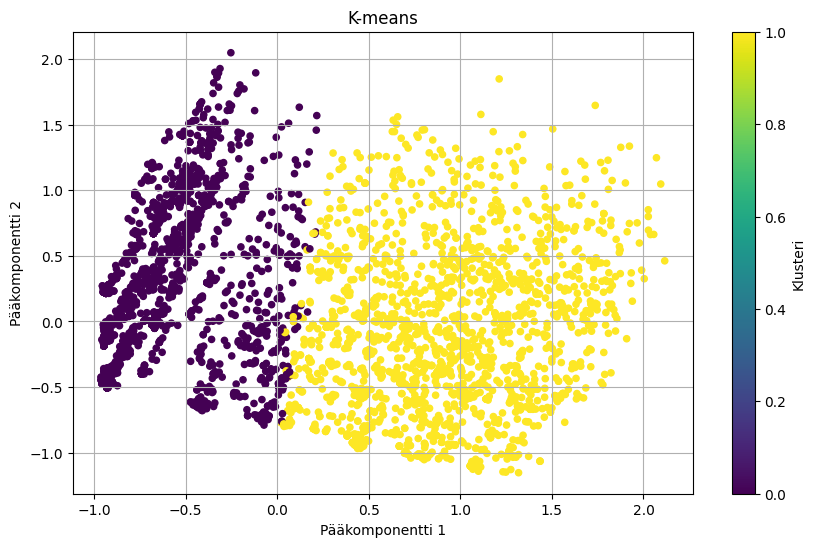

In [137]:
# Sovelletaan PCA:ta ulottuvuuden vähentämiseksi 2D:ksi visualisointia varten
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)

# K-means- klusterointi
kmeans = KMeans(n_clusters=2, init='k-means++',random_state=42) 
clusters = kmeans.fit_predict(df)
df['Cluster'] = kmeans.labels_

# Visualisointi
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=20)
plt.colorbar(label='Klusteri')
plt.title('K-means')
plt.xlabel('Pääkomponentti 1')
plt.ylabel('Pääkomponentti 2')
plt.grid(True)
plt.show()

In [138]:
df

,MentalHealthProblem,DepressedMood,MentalIllnessTreatmentCurrnt,HistoryMentalIllnessTreatmnt,SuicideAttemptHistory,SuicideThoughtHistory,AlcoholProblem,SubstanceAbuseOther,OtherAddiction,HistorySelfHarm,...,CME_MentalHealthDiagnosisOther_Social anxiety disorder,CME_MentalHealthDiagnosisOther_Social phobia,CME_MentalHealthDiagnosisOther_Sociopathy,CME_MentalHealthDiagnosisOther_Suicidal ideation,CME_MentalHealthDiagnosisOther_Suicidal ideations,CME_MentalHealthDiagnosisOther_Suicidal ideations and drug induced psychosis,CME_MentalHealthDiagnosisOther_Suicide ideation,CME_MentalHealthDiagnosisOther_Suicide ideations,CME_MentalHealthDiagnosisOther_Tourette syndrome,Cluster
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,0,1,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3996,1,0,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3997,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


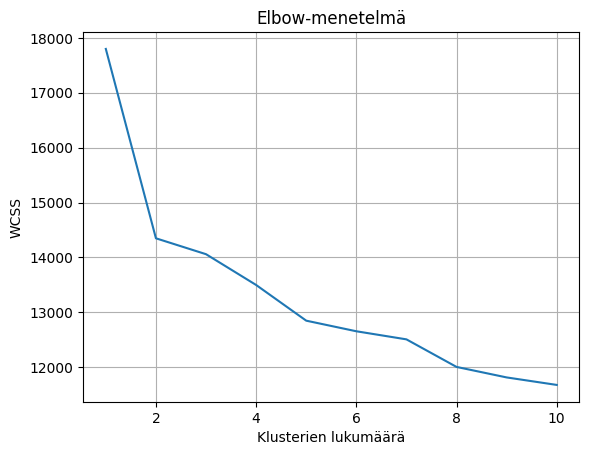

In [139]:
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):  # Tarkistetaan 1-10 klusteria
   kmeans = KMeans(n_clusters=i, random_state=42)
   kmeans.fit(df)
   wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Klusterien lukumäärä')
plt.ylabel('WCSS')
plt.title('Elbow-menetelmä')
plt.grid(True)
plt.show()

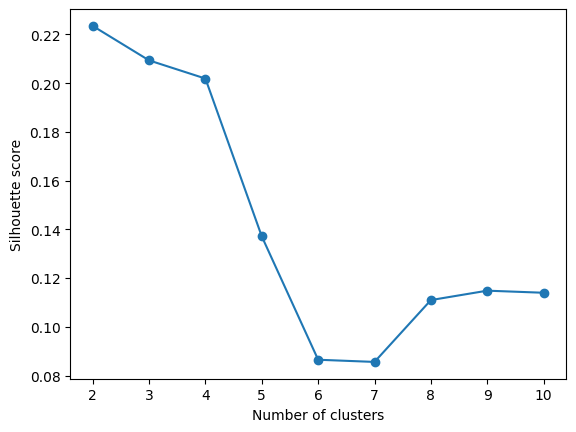

In [140]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2, 11):
    model = KMeans(n_clusters=i, random_state=42).fit(df)
    labels = model.labels_
    silhouette_scores.append(silhouette_score(df, labels))
    
# Visualisoidaan Silhouette score

plt.plot(range(2, 11), silhouette_scores, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [141]:
# Lasketaan ominaisuuksien keskiarvot kullekin klusterille
cluster_means = df.groupby('Cluster').mean()

# Kustakin klusterista etsitään ominaisuudet, joiden keskiarvot ovat suurimmat
for cluster in cluster_means.index:
    print(f"\nKluster {cluster}:")
    # Etsetään 10 ominaisuutta, joilla on korkeimmat arvot tietyssä klusterissa
    top_features = cluster_means.loc[cluster].sort_values(ascending=False).head(10)
    print(top_features)




Kluster 0:
DepressedMood             0.288660
IntimatePartnerProblem    0.280069
SuicideThoughtHistory     0.277062
Argument                  0.227663
SuicideIntentDisclosed    0.226804
FamilyRelationship        0.147766
SubstanceAbuseOther       0.145619
MentalHealthProblem       0.125000
SchoolProblem             0.095790
SuicideAttemptHistory     0.092354
Name: 0, dtype: float64

Kluster 1:
MentalHealthProblem                                0.991627
HistoryMentalIllnessTreatmnt                       0.836124
MentalIllnessTreatmentCurrnt                       0.611842
CME_MentalHealthDiagnosis1_Depression/dysthymia    0.610646
SuicideThoughtHistory                              0.593900
LE_MentalHealthDiagnosis1_Depression/dysthymia     0.449163
DepressedMood                                      0.382775
SuicideAttemptHistory                              0.372608
SuicideIntentDisclosed                             0.340311
IntimatePartnerProblem                             0.279306
Na

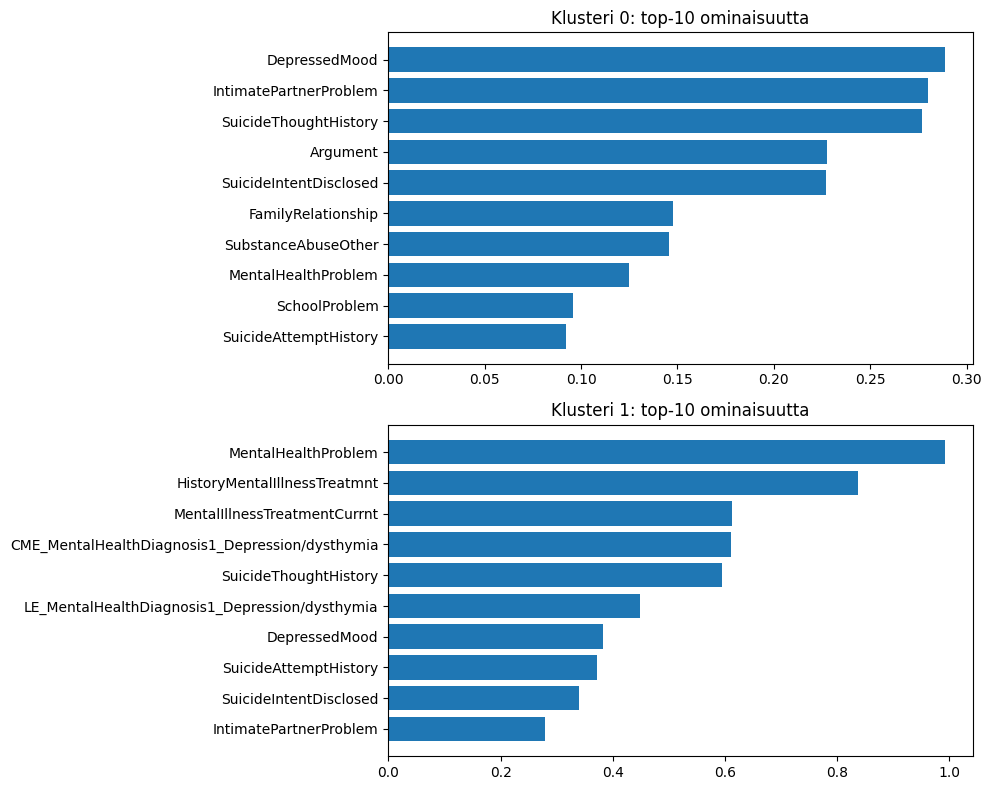

In [142]:
# Visualisoimme 10 ominaisuutta, joilla on korkeimmat painearvot kussakin klusterissa
fig, axs = plt.subplots(len(cluster_means.index), figsize=(10, 8))

for idx, cluster in enumerate(cluster_means.index):
    top_features = cluster_means.loc[cluster].sort_values(ascending=False).head(10)
    
    axs[idx].barh(top_features.index, top_features.values)
    axs[idx].set_title(f'Klusteri {cluster}: top-10 ominaisuutta')
    axs[idx].invert_yaxis()

plt.tight_layout()
plt.show()

## Klusterianalyysi ja johtopäätökset

### Klusteri 0:
**Tärkeimmät ominaisuudet:**
1. **DepressedMood (masentunut mieliala)** — 28,87 %
2. **IntimatePartnerProblem (ongelmat läheisissä ihmissuhteissa)** — 28,01 %
3. **SuicideThoughtHistory (itsemurha-ajatusten historia)** — 27,71 %
4. **Argument (riidat, konfliktit)** — 22,77 %
5. **SuicideIntentDisclosed (itsemurha-aikeiden ilmaiseminen)** — 22,68 %

**Johtopäätökset:**
- Tässä klusterissa korostuvat masentunut mieliala, ihmissuhdeongelmat ja itsemurha-ajatukset. Lähes kolmanneksella on ollut itsemurha-ajatuksia, ja heistä monet ovat ilmaisseet aikomuksensa.
- **Ehkäisytoimenpiteet**: On tärkeää kiinnittää huomiota ihmisiin, joilla on masennusoireita ja ongelmia läheisissä ihmissuhteissa. Psykologisen tuen tarjoaminen ja konfliktinhallintataitojen opettaminen voivat auttaa ennaltaehkäisemään vakavampia ongelmia.

### Klusteri 1:
**Tärkeimmät ominaisuudet:**
1. **MentalHealthProblem (mielenterveysongelmat)** — 99,16 %
2. **HistoryMentalIllnessTreatmnt (aiempi mielenterveyshoito)** — 83,61 %
3. **MentalIllnessTreatmentCurrnt (nykyinen mielenterveyshoito)** — 61,18 %
4. **Depression/Dysthymia (masennus/dystymia-diagnoosi)** — noin 61 %
5. **SuicideThoughtHistory (itsemurha-ajatusten historia)** — 59,39 %

**Johtopäätökset:**
- Lähes kaikilla tässä klusterissa olevilla on mielenterveysongelmia, ja suuri osa heistä on saanut tai saa parhaillaan hoitoa. Itsemurha-ajatuksia esiintyy monilla.
- **Ehkäisytoimenpiteet**: On välttämätöntä varmistaa jatkuva mielenterveyshoito ja seuranta. Koska monilla on diagnosoitu masennus tai dystymia, on tärkeää kiinnittää huomiota mielialan tasapainottamiseen ja itsemurha-ajatusten uusiutumisen ehkäisyyn.

### Yhteenveto itsemurhien ehkäisemiseksi:
1. **Masennuksen ja dystymian hoito**: Molemmat klusterit osoittavat, että masennuksella on keskeinen rooli itsemurhariskeissä. Masennusta hoitavien lääkkeiden lisäksi tarvitaan terapeuttista tukea ja sosiaalisen verkoston vahvistamista.
   
2. **Ihmissuhdeongelmat**: Konfliktit parisuhteissa ja perheessä korostuvat, mikä viittaa siihen, että konfliktinratkaisutaidot ja vuorovaikutustaidot ovat tärkeitä.

3. **Varhaisten varoitusmerkkien tunnistaminen**: Itsemurha-ajatukset ja aikomusten ilmaiseminen ovat kriittisiä indikaattoreita. Läheisten on hyvä oppia tunnistamaan nämä merkit ja ohjaamaan apua tarvitsevat hoidon piiriin.

4. **Mielenterveyshoidon jatkaminen**: Niille, jotka ovat saaneet tai saavat hoitoa, on tärkeää varmistaa hoidon jatkuvuus ja säännöllinen seuranta. Tämä voi estää kriisitilanteiden syntymisen.



## Asosiaatiot

In [145]:
data = df.drop(columns='Cluster')
# replace 1.0 values with True
df = data.apply(lambda x: x.map(lambda y: True if y == 1.0 else False))
df

,MentalHealthProblem,DepressedMood,MentalIllnessTreatmentCurrnt,HistoryMentalIllnessTreatmnt,SuicideAttemptHistory,SuicideThoughtHistory,AlcoholProblem,SubstanceAbuseOther,OtherAddiction,HistorySelfHarm,...,CME_MentalHealthDiagnosisOther_Social anxiety,CME_MentalHealthDiagnosisOther_Social anxiety disorder,CME_MentalHealthDiagnosisOther_Social phobia,CME_MentalHealthDiagnosisOther_Sociopathy,CME_MentalHealthDiagnosisOther_Suicidal ideation,CME_MentalHealthDiagnosisOther_Suicidal ideations,CME_MentalHealthDiagnosisOther_Suicidal ideations and drug induced psychosis,CME_MentalHealthDiagnosisOther_Suicide ideation,CME_MentalHealthDiagnosisOther_Suicide ideations,CME_MentalHealthDiagnosisOther_Tourette syndrome
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,True,False,True,True,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3996,True,False,False,True,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [146]:
from mlxtend.frequent_patterns import apriori, association_rules
# Etsetään usein esiintyviä aineistokokonaisuuksia
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.48725,(MentalHealthProblem)
1,0.32800,(DepressedMood)
2,0.25850,(MentalIllnessTreatmentCurrnt)
3,0.37250,(HistoryMentalIllnessTreatmnt)
4,0.20950,(SuicideAttemptHistory)
...,...,...
74,0.14525,"(HistoryMentalIllnessTreatmnt, MentalHealthProblem, SuicideThoughtHistory, MentalIllnessTreatmentCurrnt)"
75,0.12225,"(HistoryMentalIllnessTreatmnt, MentalHealthProblem, LE_MentalHealthDiagnosis1_Depression/dysthymia, MentalIllnessTreatmentCurrnt)"
76,0.14675,"(CME_MentalHealthDiagnosis1_Depression/dysthymia, MentalHealthProblem, HistoryMentalIllnessTreatmnt, MentalIllnessTreatmentCurrnt)"
77,0.11850,"(CME_MentalHealthDiagnosis1_Depression/dysthymia, MentalHealthProblem, HistoryMentalIllnessTreatmnt, SuicideThoughtHistory)"


In [147]:
# Generoidaan assosiatiivisia sääntöjä

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Järjestetään säännöt laskevaan järjestykseen confidence-arvon mukaan

rules = rules.sort_values(by='confidence', ascending=False)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(LE_MentalHealthDiagnosis1_Depression/dysthymia),(MentalHealthProblem),0.19625,0.48725,0.19625,1.000000,2.052335,0.100627,inf,0.637947
10,(CME_MentalHealthDiagnosis1_Depression/dysthymia),(MentalHealthProblem),0.27800,0.48725,0.27800,1.000000,2.052335,0.142545,inf,0.710180
13,(MentalIllnessTreatmentCurrnt),(HistoryMentalIllnessTreatmnt),0.25850,0.37250,0.25850,1.000000,2.684564,0.162209,inf,0.846258
68,"(CME_MentalHealthDiagnosis1_Depression/dysthymia, HistoryMentalIllnessTreatmnt)",(MentalHealthProblem),0.19525,0.48725,0.19525,1.000000,2.052335,0.100114,inf,0.637154
140,"(CME_MentalHealthDiagnosis1_Depression/dysthymia, HistoryMentalIllnessTreatmnt, SuicideThoughtHistory)",(MentalHealthProblem),0.11850,0.48725,0.11850,1.000000,2.052335,0.060761,inf,0.581679
...,...,...,...,...,...,...,...,...,...,...
25,(Argument),(SuicideThoughtHistory),0.22100,0.40950,0.11500,0.520362,1.270725,0.024501,1.231137,0.273489
1,(MentalHealthProblem),(MentalIllnessTreatmentCurrnt),0.48725,0.25850,0.25300,0.519241,2.008668,0.127046,1.542352,0.979342
41,(MentalHealthProblem),"(HistoryMentalIllnessTreatmnt, MentalIllnessTreatmentCurrnt)",0.48725,0.25850,0.25300,0.519241,2.008668,0.127046,1.542352,0.979342
74,(SuicideAttemptHistory),"(MentalHealthProblem, SuicideThoughtHistory)",0.20950,0.25900,0.10700,0.510740,1.971969,0.052740,1.514532,0.623520


In [148]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=2)

# Järjestetään säännöt laskevaan järjestykseen lift-arvon mukaan
rules = rules.sort_values(by='lift', ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
122,"(MentalHealthProblem, MentalIllnessTreatmentCurrnt)","(HistoryMentalIllnessTreatmnt, LE_MentalHealthDiagnosis1_Depression/dysthymia)",0.25300,0.15575,0.12225,0.483202,3.102418,0.082845,1.633616,0.907190
119,"(HistoryMentalIllnessTreatmnt, LE_MentalHealthDiagnosis1_Depression/dysthymia)","(MentalHealthProblem, MentalIllnessTreatmentCurrnt)",0.15575,0.25300,0.12225,0.784912,3.102418,0.082845,3.472993,0.802690
82,"(HistoryMentalIllnessTreatmnt, LE_MentalHealthDiagnosis1_Depression/dysthymia)",(MentalIllnessTreatmentCurrnt),0.15575,0.25850,0.12225,0.784912,3.036409,0.081989,3.447422,0.794390
87,(MentalIllnessTreatmentCurrnt),"(HistoryMentalIllnessTreatmnt, LE_MentalHealthDiagnosis1_Depression/dysthymia)",0.25850,0.15575,0.12225,0.472921,3.036409,0.081989,1.601751,0.904469
114,"(HistoryMentalIllnessTreatmnt, MentalHealthProblem, LE_MentalHealthDiagnosis1_Depression/dysthymia)",(MentalIllnessTreatmentCurrnt),0.15575,0.25850,0.12225,0.784912,3.036409,0.081989,3.447422,0.794390
...,...,...,...,...,...,...,...,...,...,...
112,(MentalHealthProblem),"(HistoryMentalIllnessTreatmnt, MentalIllnessTreatmentCurrnt, SuicideThoughtHistory)",0.48725,0.14775,0.14525,0.298102,2.017608,0.073259,1.214207,0.983644
1,(MentalIllnessTreatmentCurrnt),(MentalHealthProblem),0.25850,0.48725,0.25300,0.978723,2.008668,0.127046,24.099250,0.677219
23,"(HistoryMentalIllnessTreatmnt, MentalIllnessTreatmentCurrnt)",(MentalHealthProblem),0.25850,0.48725,0.25300,0.978723,2.008668,0.127046,24.099250,0.677219
26,(MentalHealthProblem),"(HistoryMentalIllnessTreatmnt, MentalIllnessTreatmentCurrnt)",0.48725,0.25850,0.25300,0.519241,2.008668,0.127046,1.542352,0.979342


## Yritetään ennustaa masennusta ja itsemurha-ajatuksia `Random Forest` - menetelmällä 

## Itsemurhajan ajatuksia ennustaminen

In [149]:
data

,MentalHealthProblem,DepressedMood,MentalIllnessTreatmentCurrnt,HistoryMentalIllnessTreatmnt,SuicideAttemptHistory,SuicideThoughtHistory,AlcoholProblem,SubstanceAbuseOther,OtherAddiction,HistorySelfHarm,...,CME_MentalHealthDiagnosisOther_Social anxiety,CME_MentalHealthDiagnosisOther_Social anxiety disorder,CME_MentalHealthDiagnosisOther_Social phobia,CME_MentalHealthDiagnosisOther_Sociopathy,CME_MentalHealthDiagnosisOther_Suicidal ideation,CME_MentalHealthDiagnosisOther_Suicidal ideations,CME_MentalHealthDiagnosisOther_Suicidal ideations and drug induced psychosis,CME_MentalHealthDiagnosisOther_Suicide ideation,CME_MentalHealthDiagnosisOther_Suicide ideations,CME_MentalHealthDiagnosisOther_Tourette syndrome
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,0,1,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3996,1,0,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


target = 'SuicideThoughtHistory'

# Jaatetaan datajoukko
X = data.drop(columns=[target])
y = data[target]

In [ ]:
# Jaatetaan tiedot oppi- ja testijoukoon
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
import numpy as np
from sklearn.model_selection import GridSearchCV
model_rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'bootstrap': [True],
    'criterion': ['gini'],
    'max_samples': [0.6],
    'max_features': [0.6],
    'random_state': [42]
}
# GridSearchCV
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=10, scoring='accuracy')

# Parametrien haku opettusjoukon avulla 
train_targets = np.ravel(y_train)
grid_search.fit(X_train, y_train)

# Parhaan mallin ja parametrit
best_model_rf = grid_search.best_estimator_
best_params_rf = grid_search.best_params_

print("Best Parameters:", best_params_rf)

Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_features': 0.6, 'max_samples': 0.6, 'n_estimators': 200, 'random_state': 42}


In [76]:
# Carry out 10-fold cross-validation
cv_scores = cross_val_score(best_model_rf, X_train, train_targets, cv=10)

# Tulokset
print(f'Fold-specific accuracies: {cv_scores}')
print(f'Overall accuracy (avg. of folds): {cv_scores.mean():.4f}')

Fold-specific accuracies: [0.715625 0.671875 0.725    0.75625  0.715625 0.734375 0.753125 0.6875
 0.7125   0.7     ]
Overall accuracy (avg. of folds): 0.7172


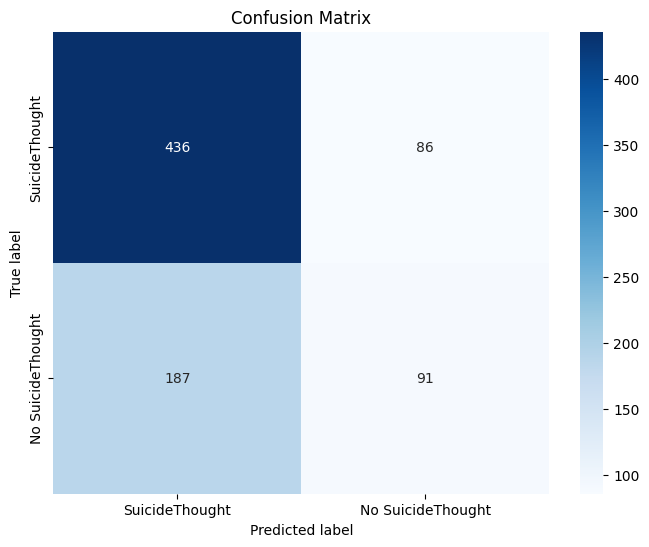

In [155]:
import seaborn as sns
predictions = best_model_rf.predict(X_test)

cm = confusion_matrix(y_test, predictions)
labels = ('SuicideThought', 'No SuicideThought')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [156]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76       522
           1       0.51      0.33      0.40       278

    accuracy                           0.66       800
   macro avg       0.61      0.58      0.58       800
weighted avg       0.64      0.66      0.64       800



## Masennuksen ennustaminen

In [80]:
target = 'DepressedMood'

# Jaatetaan datajoukko
X = data.drop(columns=[target])
y = data[target]

In [150]:
# Jaatetaan tiedot oppi- ja testijoukoon
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
model_rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'bootstrap': [True],
    'criterion': ['gini'],
    'max_samples': [0.6],
    'max_features': [0.6],
    'random_state': [42]
}
# GridSearchCV
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=10, scoring='accuracy')

# Parametrien haku opettusjoukon avulla 
train_targets = np.ravel(y_train)
grid_search.fit(X_train, y_train)

# Parhaan mallin ja parametrit
best_model_rf = grid_search.best_estimator_
best_params_rf = grid_search.best_params_

print("Best Parameters:", best_params_rf)

Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_features': 0.6, 'max_samples': 0.6, 'n_estimators': 200, 'random_state': 42}


In [152]:
# Carry out 10-fold cross-validation
cv_scores = cross_val_score(best_model_rf, X_train, train_targets, cv=10)

# Tulokset
print(f'Fold-specific accuracies: {cv_scores}')
print(f'Overall accuracy (avg. of folds): {cv_scores.mean():.4f}')

Fold-specific accuracies: [0.69375  0.68125  0.65     0.6375   0.65625  0.703125 0.696875 0.63125
 0.653125 0.678125]
Overall accuracy (avg. of folds): 0.6681


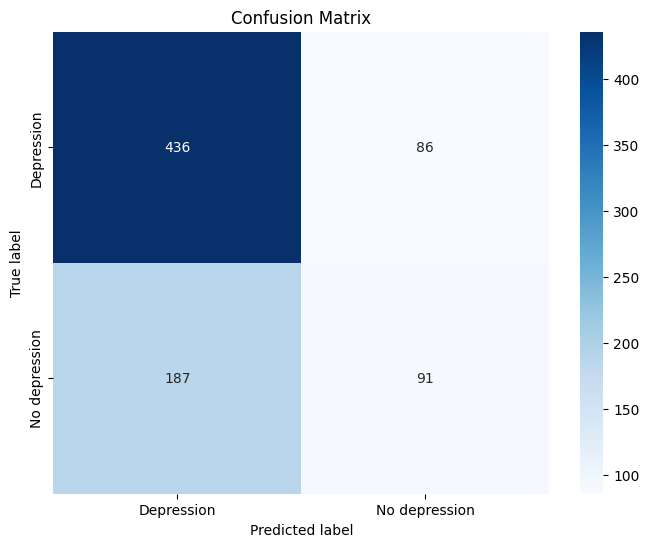

In [153]:
predictions = best_model_rf.predict(X_test)

cm = confusion_matrix(y_test, predictions)
labels = ('Depression', 'No depression')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [154]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76       522
           1       0.51      0.33      0.40       278

    accuracy                           0.66       800
   macro avg       0.61      0.58      0.58       800
weighted avg       0.64      0.66      0.64       800

